In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('stock_splits_dividends.csv', parse_dates=['Date'])

In [3]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Describe the dataset
print("\nStatistical description of the dataset:")
print(df.describe())

First few rows of the dataset:
        Date  Stock_Price  Earnings_Per_Share  P_E_Ratio  Dividend_Yield  \
0 2000-01-01    87.454012            2.666196  15.234114        3.690812   
1 2000-01-02   145.071431            5.877109  14.939576        4.186726   
2 2000-01-03   123.199394            8.856513  28.125092        2.001872   
3 2000-01-04   109.865848            7.590024  14.990924        3.499496   
4 2000-01-05    65.601864            8.259050  15.438995        3.286984   

     Market_Cap  Stock_Split  Dividend_Payout  
0  5.762759e+08            0         3.241285  
1  8.073780e+08            0         0.861932  
2  7.625593e+08            0         4.361973  
3  1.623609e+08            0         3.065581  
4  1.577570e+08            0         0.786019  

Missing values in the dataset:
Date                  0
Stock_Price           0
Earnings_Per_Share    0
P_E_Ratio             0
Dividend_Yield        0
Market_Cap            0
Stock_Split           0
Dividend_Payout       0


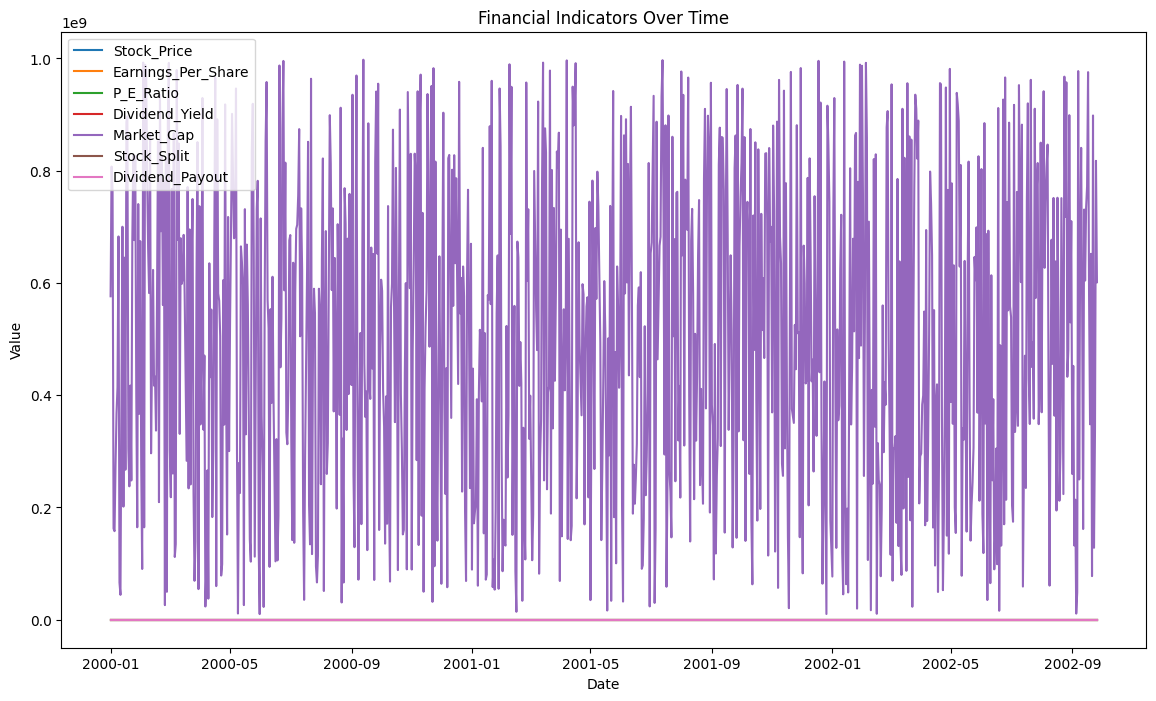

In [4]:
# Plotting the time series of each feature
plt.figure(figsize=(14, 8))
for column in df.columns[1:]:
    plt.plot(df['Date'], df[column], label=column)
plt.title('Financial Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

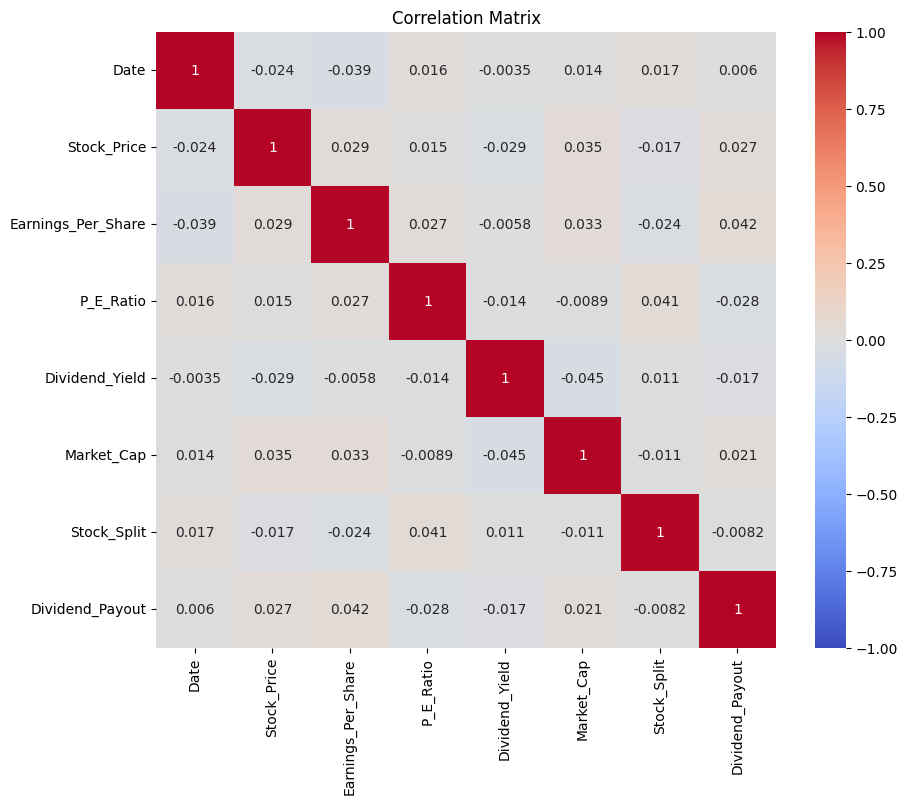

In [5]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


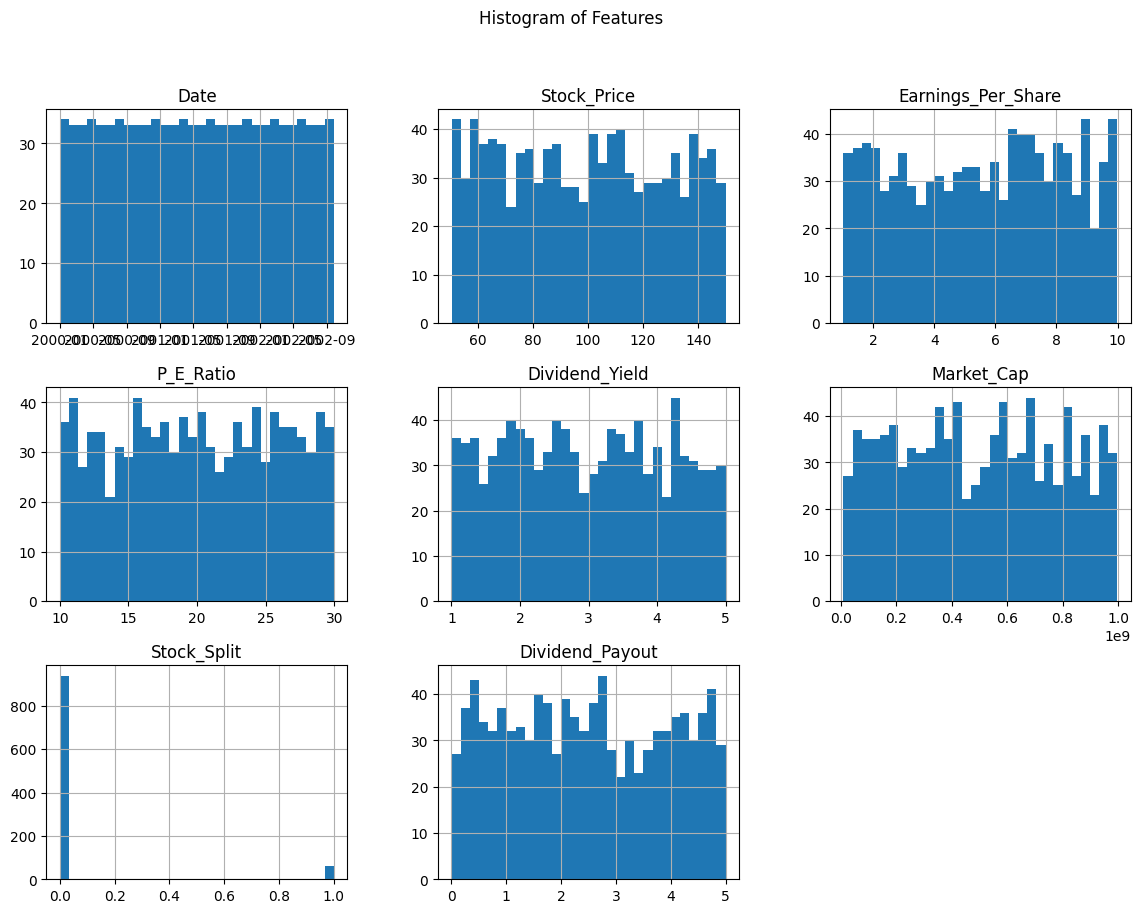

In [6]:
# Plot histograms of each feature
df.hist(bins=30, figsize=(14, 10))
plt.suptitle('Histogram of Features')
plt.show()


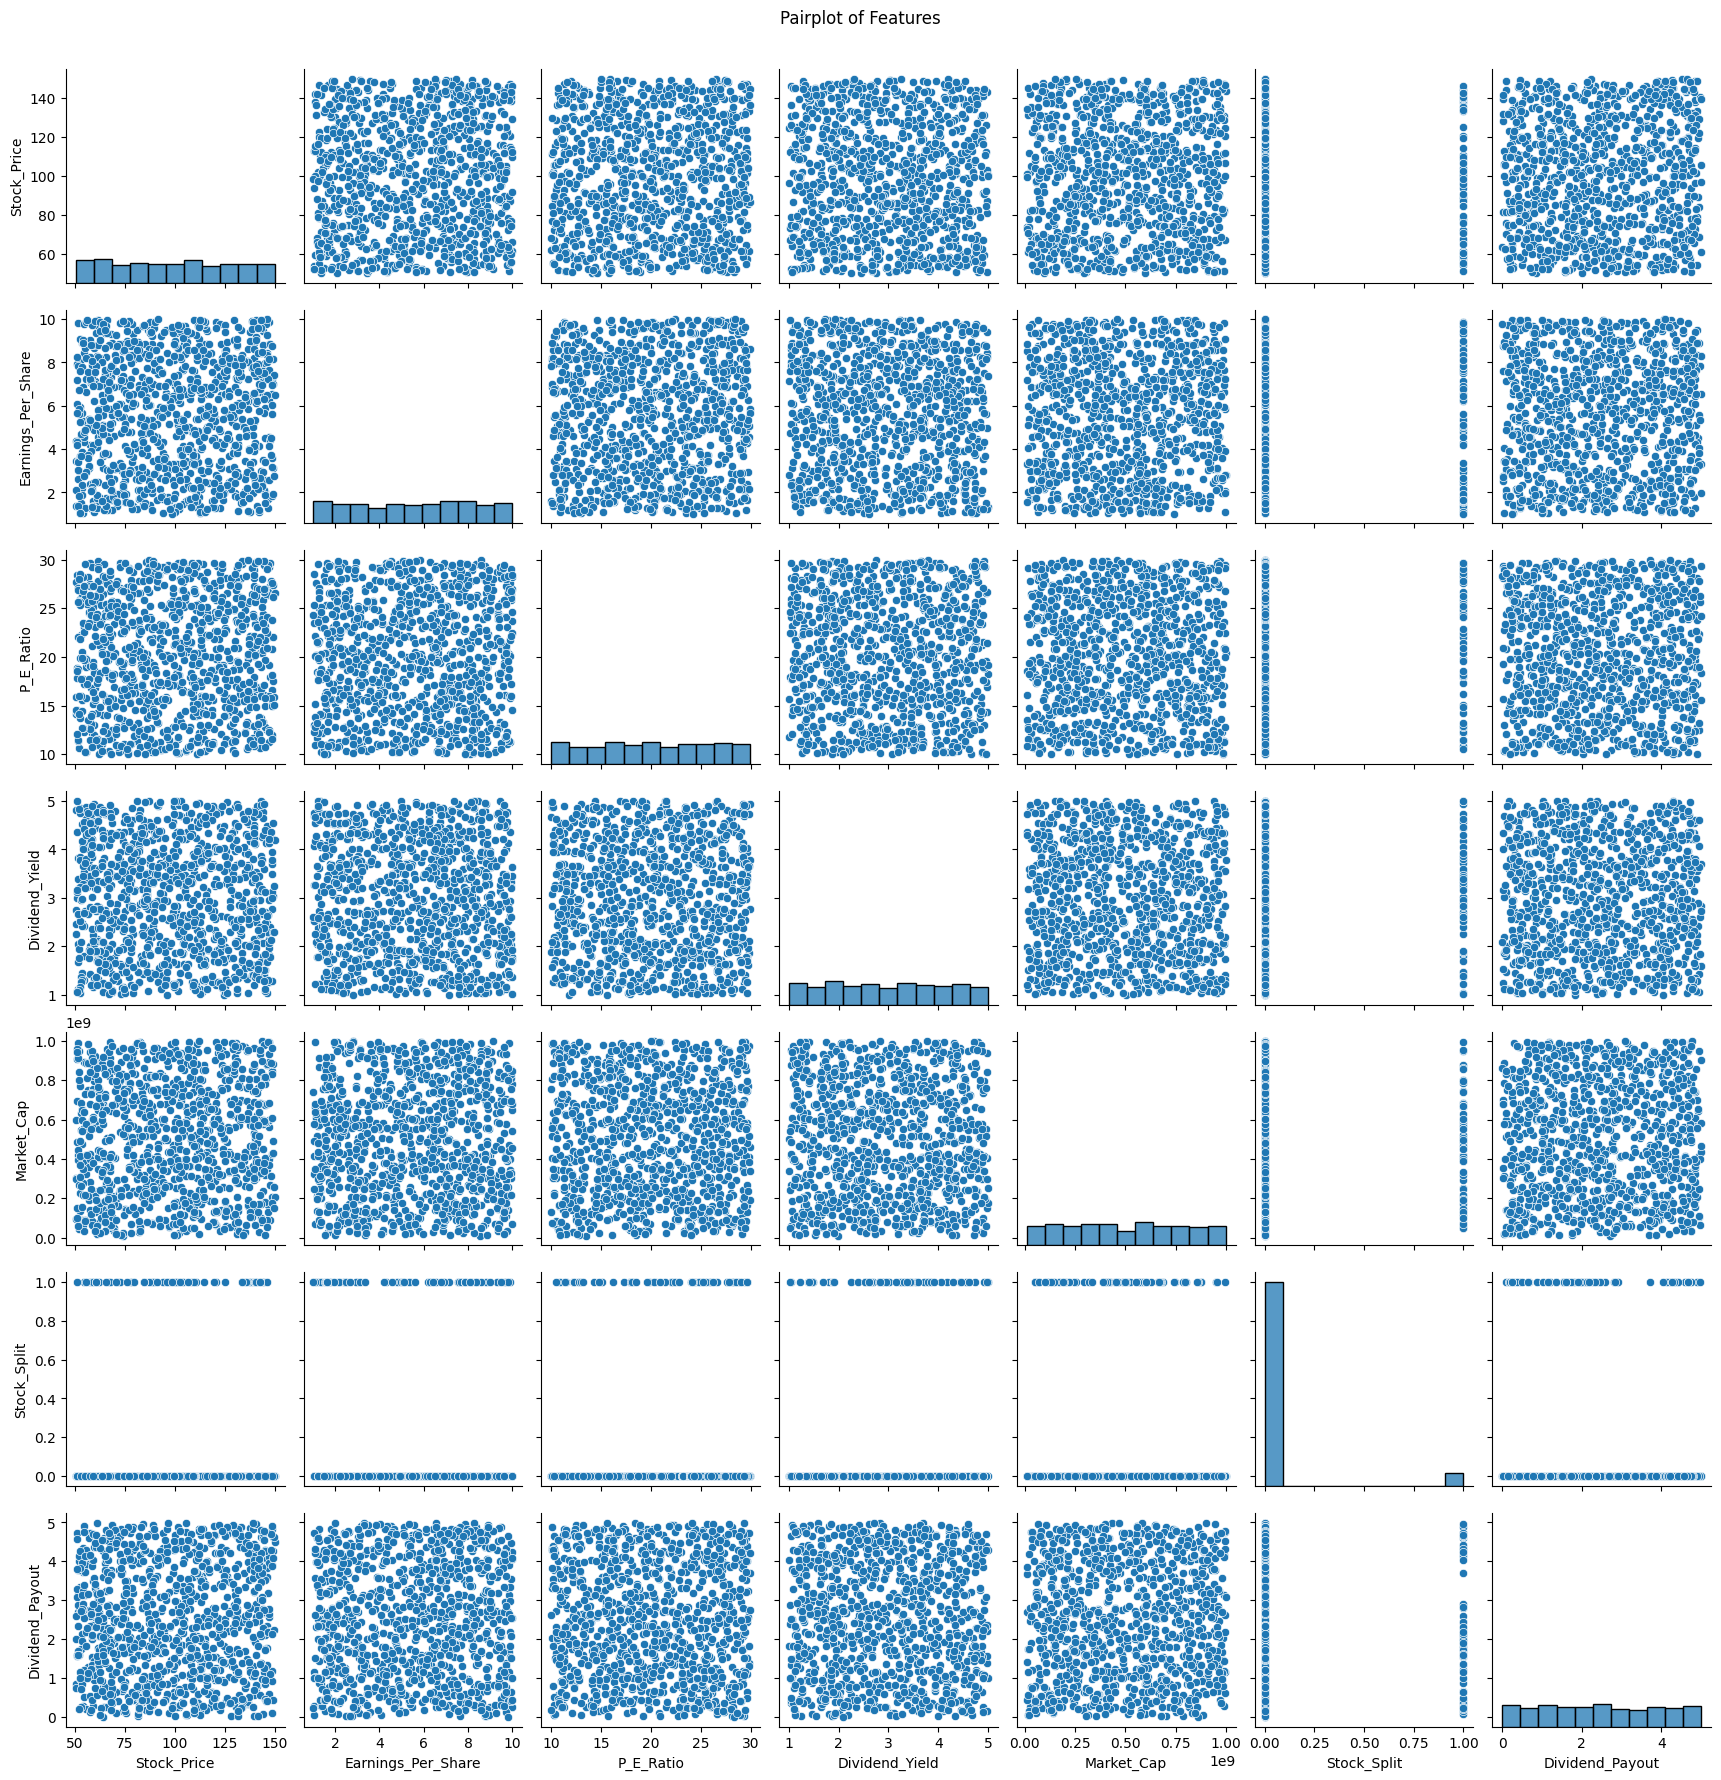

In [7]:
# Plot pairplot to see the relationships between variables
sns.pairplot(df.drop('Date', axis=1))
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(['Date', 'Stock_Split', 'Dividend_Payout'], axis=1)), columns=df.columns[1:-2])
df_scaled['Stock_Split'] = df['Stock_Split']
df_scaled['Dividend_Payout'] = df['Dividend_Payout']

# Prepare the data for classification and regression
X = df_scaled.drop(['Stock_Split', 'Dividend_Payout'], axis=1).values
y_split = df_scaled['Stock_Split'].values
y_dividend = df_scaled['Dividend_Payout'].values

X_train, X_test, y_split_train, y_split_test = train_test_split(X, y_split, test_size=0.2, random_state=42)
X_train, X_test, y_dividend_train, y_dividend_test = train_test_split(X, y_dividend, test_size=0.2, random_state=42)

# Reshape the data for LSTM and GRU models
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model for stock split prediction
lstm_model_split = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1, activation='sigmoid')
])

lstm_model_split.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model_split.summary()

# Train the LSTM model for stock split prediction
history_lstm_split = lstm_model_split.fit(X_train_reshaped, y_split_train, epochs=50, validation_data=(X_test_reshaped, y_split_test))

# Define the LSTM model for dividend payout prediction
lstm_model_dividend = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])

lstm_model_dividend.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model_dividend.summary()

# Train the LSTM model for dividend payout prediction
history_lstm_dividend = lstm_model_dividend.fit(X_train_reshaped, y_dividend_train, epochs=50, validation_data=(X_test_reshaped, y_dividend_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 2s 17ms/step - loss: 0.6754 - accuracy: 0.7387 - val_loss: 0.6400 - val_accuracy: 0.9650
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6070 - accuracy: 0.9337 - val_loss: 0.5548 - val_accuracy: 0.9650
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5150 - accuracy: 0.9337 - val_loss: 0.4472 - val_accuracy: 0.

In [10]:
from tensorflow.keras.layers import GRU

# Define the GRU model for stock split prediction
gru_model_split = Sequential([
    GRU(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1, activation='sigmoid')
])

gru_model_split.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model_split.summary()

# Train the GRU model for stock split prediction
history_gru_split = gru_model_split.fit(X_train_reshaped, y_split_train, epochs=50, validation_data=(X_test_reshaped, y_split_test))

# Define the GRU model for dividend payout prediction
gru_model_dividend = Sequential([
    GRU(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])

gru_model_dividend.compile(optimizer='adam', loss='mse', metrics=['mae'])
gru_model_dividend.summary()

# Train the GRU model for dividend payout prediction
history_gru_dividend = gru_model_dividend.fit(X_train_reshaped, y_dividend_train, epochs=50, validation_data=(X_test_reshaped, y_dividend_test))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                8550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8601 (33.60 KB)
Trainable params: 8601 (33.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 2s 23ms/step - loss: 0.6209 - accuracy: 0.9062 - val_loss: 0.5366 - val_accuracy: 0.9650
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.4775 - accuracy: 0.9337 - val_loss: 0.3817 - val_accuracy: 0.9650
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3542 - accuracy: 0.9337 - val_loss: 0.2620 - val_accuracy: 0.

In [11]:
from tensorflow.keras.layers import Flatten

# Define the DNN model for stock split prediction
dnn_model_split = Sequential([
    Flatten(input_shape=(1, X_train.shape[1])),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn_model_split.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model_split.summary()

# Train the DNN model for stock split prediction
history_dnn_split = dnn_model_split.fit(X_train_reshaped, y_split_train, epochs=50, validation_data=(X_test_reshaped, y_split_test))

# Define the DNN model for dividend payout prediction
dnn_model_dividend = Sequential([
    Flatten(input_shape=(1, X_train.shape[1])),
    Dense(100, activation='relu'),
    Dense(1)
])

dnn_model_dividend.compile(optimizer='adam', loss='mse', metrics=['mae'])
dnn_model_dividend.summary()

# Train the DNN model for dividend payout prediction
history_dnn_dividend = dnn_model_dividend.fit(X_train_reshaped, y_dividend_train, epochs=50, validation_data=(X_test_reshaped, y_dividend_test))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense_4 (Dense)             (None, 100)               600       
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 701 (2.74 KB)
Trainable params: 701 (2.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 1s 10ms/step - loss: 0.5503 - accuracy: 0.8913 - val_loss: 0.4081 - val_accuracy: 0.9650
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9337 - val_loss: 0.2535 - val_accuracy: 0.9650
Epoch 3